In [3]:
import os
import pyproj
import geopandas as gpd
from pathlib import Path
from eumap.misc import find_files, nan_percentile, GoogleSheet, ttprint
from eumap.raster import read_rasters, save_rasters
from eumap.mapper import SpaceOverlay
os.environ['PROJ_LIB'] = os.path.join(pyproj.datadir.get_data_dir(), 'proj')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
# # overlay depth
# fn = []
    
# for ii in ['_m_','_p025_','_p975_']:
#     fne = [f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3{ii}30m_b0cm..20cm_20200101_20221231_eu_epsg.3035_v20240804.tif',
#       f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3{ii}30m_b20cm..50cm_20200101_20221231_eu_epsg.3035_v20240804.tif',
#       f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3{ii}30m_b50cm..100cm_20200101_20221231_eu_epsg.3035_v20240804.tif',
#       f'http://192.168.1.30:8333/ai4sh-landmasked/oc/oc_iso.10694.1995.mg.cm3{ii}30m_b100cm..200cm_20200101_20221231_eu_epsg.3035_v20240804.tif']
#     fn.extend(fne)
    
# fn = [Path(ii) for ii in fn]
# sub = gpd.read_file(f'/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/plot_depth.overview_points.shp')
# # sub = sub.to_crs(epsg=3035)
# temp = SpaceOverlay(
#         points=sub, 
#         fn_layers=fn, verbose=True
# ).run()

# fn = [str(a) for a in fn]
# fname = ['ocd_' + a.split('_')[2] + '_' + a.split('_')[4] for a in fn]
# fn = [ii.split('/')[-1][0:-4] for ii in fn]
# name_map = dict(zip(fn,fname))
# temp = temp.rename(columns = name_map)

# temp = temp.drop(columns=['overlay_id'])

# temp.to_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/plot_depth.series_points.csv',index=False)

temp = pd.read_csv('/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/plot_depth.series_points.csv')

In [6]:
ml = ['ocd_m_b0cm..20cm', 'ocd_m_b20cm..50cm', 'ocd_m_b50cm..100cm', 'ocd_m_b100cm..200cm']
p975l = ['ocd_p975_b0cm..20cm', 'ocd_p975_b20cm..50cm', 'ocd_p975_b50cm..100cm', 'ocd_p975_b100cm..200cm']
p025l = ['ocd_p025_b0cm..20cm', 'ocd_p025_b20cm..50cm', 'ocd_p025_b50cm..100cm', 'ocd_p025_b100cm..200cm']
depth = [10,35,75,150]
depth_label = ['0-20','20-50','50-100','100-200']
temp['code'] = ['A','B','C']

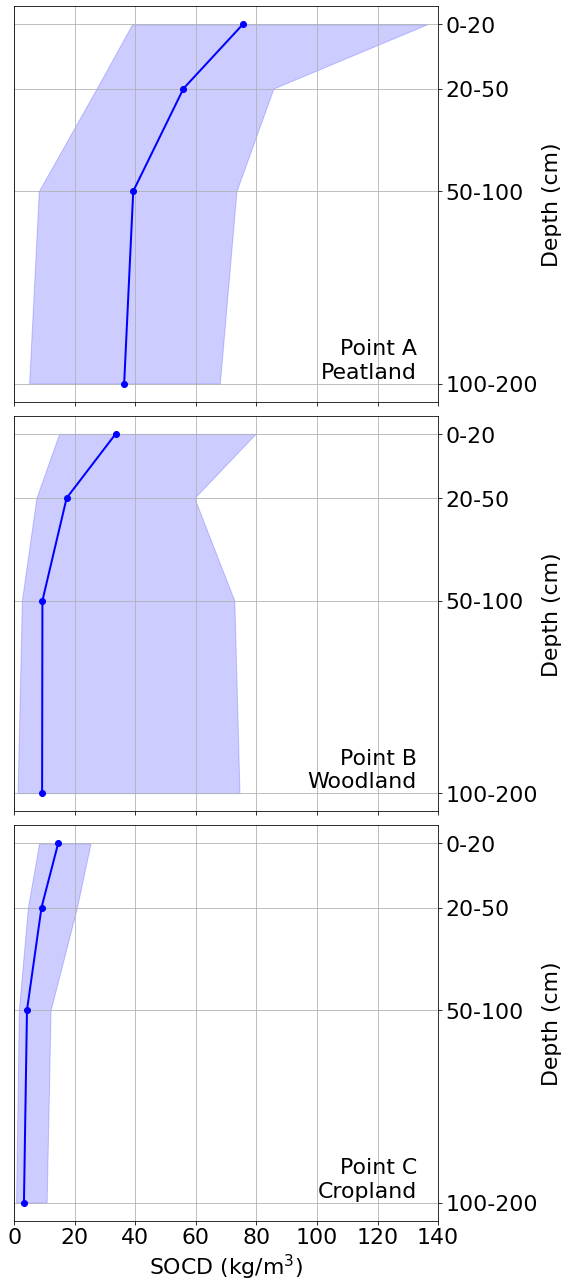

In [7]:

# Convert the columns to numeric, coercing any errors, and handle any non-numeric values
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18), sharex=True)

# Loop over selected rows and corresponding axes
for idx, ii in enumerate([0, 1, 2]):
    mean_values = temp.iloc[ii][ml].astype(float) / 10
    upper_bounds = temp.iloc[ii][p975l].astype(float) / 10
    lower_bounds = temp.iloc[ii][p025l].astype(float) / 10
    
    # Plot mean values
    axes[idx].plot(mean_values, depth, 'o-', label='Mean', color='blue', linewidth=2)
    
    # Use fill_betweenx for the confidence intervals
    axes[idx].fill_betweenx(depth, lower_bounds, upper_bounds, color='blue', alpha=0.2, label='95% CI')
    
    # Set the y-axis with depth labels on the right-hand side
    axes[idx].set_yticks(depth)
    axes[idx].set_yticklabels(depth_label, fontsize=22)
    axes[idx].yaxis.set_label_position('right')
    axes[idx].yaxis.tick_right()
    axes[idx].set_ylabel('Depth (cm)', fontsize=22)
    
    # Set x-axis label only for the last subplot
    if idx == 2:
        axes[idx].set_xlabel('SOCD (kg/m$^3$)', fontsize=22)
    else:
        axes[idx].tick_params(labelbottom=False)
    
    axes[idx].invert_yaxis()  # Invert y-axis to have depth increasing downwards
    axes[idx].grid(True)
    
    # Place title text at the bottom right corner of each subplot
    note = temp.iloc[ii]['note']
    code = temp.iloc[ii]['code']
    axes[idx].text(0.95, 0.05, f'Point {code}\n{note}', transform=axes[idx].transAxes, fontsize=22, 
                   verticalalignment='bottom', horizontalalignment='right')

plt.xlim([0, 140])
plt.xticks(fontsize=22)
plt.tight_layout()

# Save the combined plot
plt.savefig("/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/combined_plot_depth.series.svg", format='svg')

# Show the combined plot
plt.show()

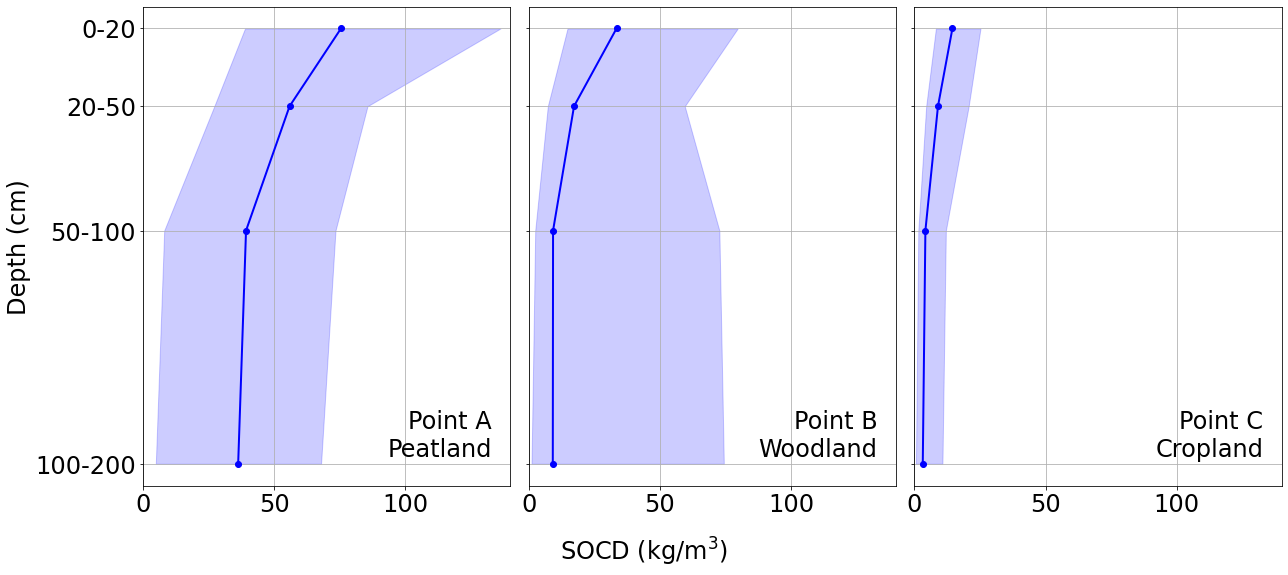

In [27]:

# Convert the columns to numeric, coercing any errors, and handle any non-numeric values
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Create a figure with side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8), sharey=True)

# Loop over selected rows and corresponding axes
for idx, ii in enumerate([0, 1, 2]):
    mean_values = temp.iloc[ii][ml].astype(float) / 10
    upper_bounds = temp.iloc[ii][p975l].astype(float) / 10
    lower_bounds = temp.iloc[ii][p025l].astype(float) / 10
    
    # Plot mean values
    axes[idx].plot(mean_values, depth, 'o-', label='Mean', color='blue', linewidth=2)
    
    # Use fill_betweenx for the confidence intervals
    axes[idx].fill_betweenx(depth, lower_bounds, upper_bounds, color='blue', alpha=0.2, label='95% CI')
    
    # Set y-axis ticks and labels only on the first subplot
    if idx == 0:
        axes[idx].set_yticks(depth)
        axes[idx].set_yticklabels(depth_label, fontsize=24)
        axes[idx].set_ylabel('Depth (cm)', fontsize=24)
    else:
        axes[idx].tick_params(labelleft=False)  # Hide y-axis ticks and labels for the other subplots
    
    axes[idx].invert_yaxis()  # Invert y-axis to have depth increasing downwards
    axes[idx].grid(True)
    
    # Place title text at the bottom right corner of each subplot
    note = temp.iloc[ii]['note']
    code = temp.iloc[ii]['code']
    axes[idx].text(0.95, 0.05, f'Point {code}\n{note}', transform=axes[idx].transAxes, fontsize=24, 
                   verticalalignment='bottom', horizontalalignment='right')
    
    # Set consistent x-limits and x-ticks for all subplots
    axes[idx].set_xlim([0, 140])
    axes[idx].tick_params(axis='x', labelsize=24)

# Set a common x-axis label for all subplots
fig.text(0.5, 0.02, 'SOCD (kg/m$^3$)', ha='center', fontsize=24)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to accommodate the shared x-label
plt.subplots_adjust(bottom=0.15)
# Save the combined plot
plt.savefig("/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/combined_plot_hori_depth_series.svg", format='svg')

# Show the combined plot
plt.show()


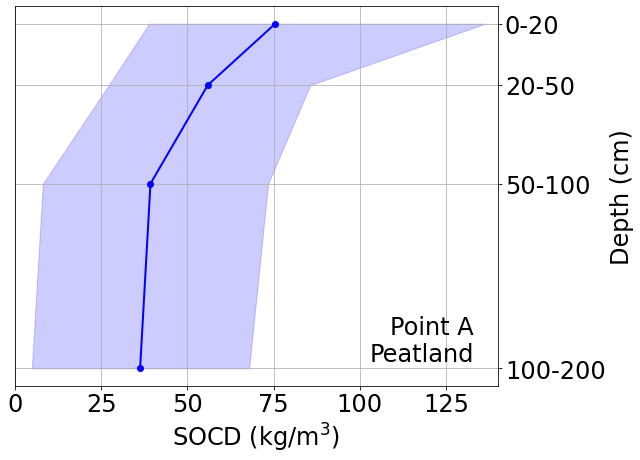

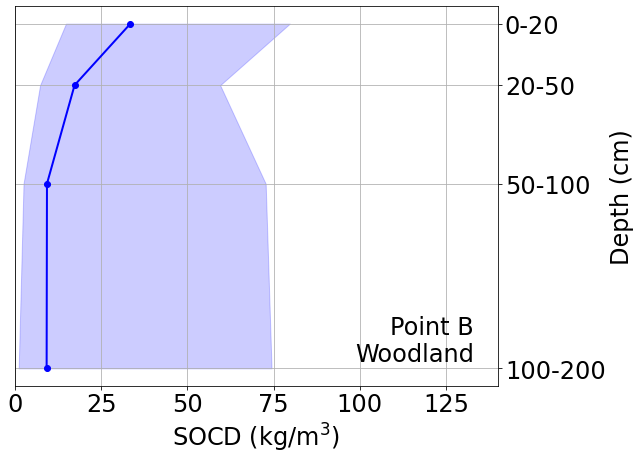

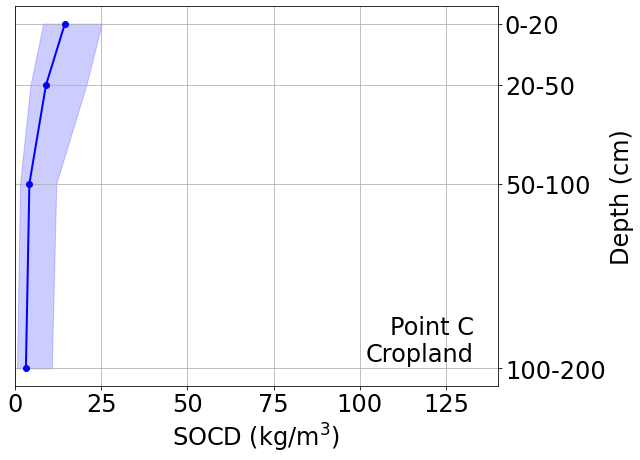

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the columns to numeric, coercing any errors, and handle any non-numeric values
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Indices of the selected rows
indices = [0, 1, 2]
points =['A','B','C']
# Plotting each subplot separately
for idx, ii in enumerate(indices):
    fig, ax = plt.subplots(figsize=(9,6.5))  # Adjust figure size if needed

    mean_values = temp.iloc[ii][ml].astype(float) / 10
    upper_bounds = temp.iloc[ii][p975l].astype(float) / 10
    lower_bounds = temp.iloc[ii][p025l].astype(float) / 10

    # Plot mean values
    ax.plot(mean_values, depth, 'o-', label='Mean', color='blue', linewidth=2)

    # Use fill_betweenx for the confidence intervals
    ax.fill_betweenx(depth, lower_bounds, upper_bounds, color='blue', alpha=0.2, label='95% CI')

    # Invert y-axis to have depth increasing downwards
    ax.invert_yaxis()
    ax.grid(True)

    # Place title text at the bottom right corner
    note = temp.iloc[ii]['note']
    code = temp.iloc[ii]['code']
    ax.text(0.95, 0.05, f'Point {code}\n{note}', transform=ax.transAxes, fontsize=24, 
            verticalalignment='bottom', horizontalalignment='right')

    # Set consistent x-limits
    ax.set_xlim([0, 140])
    ax.tick_params(axis='x', labelsize=24)

    ax.set_yticks(depth)
    ax.set_yticklabels(depth_label, fontsize=24)
    ax.set_ylabel('Depth (cm)', fontsize=24)
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()
       
    ax.set_xlabel('SOCD (kg/m$^3$)', fontsize=24)

    # Save each plot separately
    fig.tight_layout()
    fig.savefig(f"/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/plot_{points[ii]}.svg", format='svg')

    # Show the plot
    plt.show()


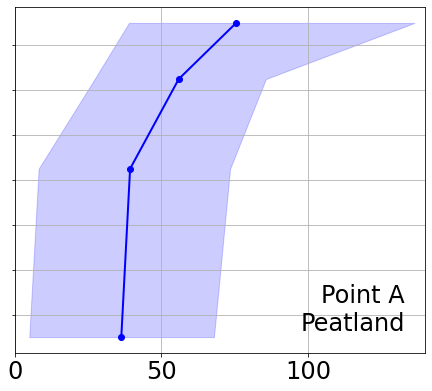

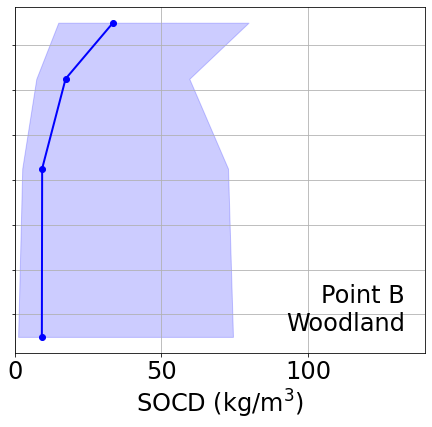

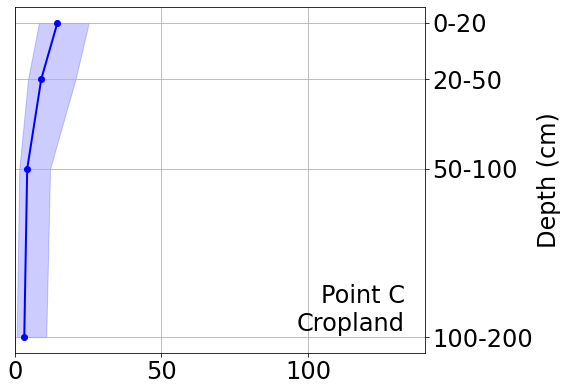

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
# Convert the columns to numeric, coercing any errors, and handle any non-numeric values
temp[ml] = temp[ml].apply(pd.to_numeric, errors='coerce')
temp[p975l] = temp[p975l].apply(pd.to_numeric, errors='coerce')
temp[p025l] = temp[p025l].apply(pd.to_numeric, errors='coerce')

# Indices of the selected rows
indices = [0, 1, 2]
points = ['A', 'B', 'C']

# Define common settings for consistent size
figsize = (7,6) 

for idx, ii in enumerate(indices):
    # Create the figure and GridSpec layout
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(1, 1, figure=fig, left=(1 - plot_area_width) / 2, right=(1 + plot_area_width) / 2, top=0.95, bottom=0.15)
    ax = fig.add_subplot(gs[0])

    mean_values = temp.iloc[ii][ml].astype(float) / 10
    upper_bounds = temp.iloc[ii][p975l].astype(float) / 10
    lower_bounds = temp.iloc[ii][p025l].astype(float) / 10

    # Plot mean values
    ax.plot(mean_values, depth, 'o-', label='Mean', color='blue', linewidth=2)

    # Use fill_betweenx for the confidence intervals
    ax.fill_betweenx(depth, lower_bounds, upper_bounds, color='blue', alpha=0.2, label='95% CI')

    # Invert y-axis to have depth increasing downwards
    ax.invert_yaxis()
    ax.grid(True)

    # Place title text at the bottom right corner
    note = temp.iloc[ii]['note']
    code = temp.iloc[ii]['code']
    ax.text(0.95, 0.05, f'Point {code}\n{note}', transform=ax.transAxes, fontsize=24, 
            verticalalignment='bottom', horizontalalignment='right')

    # Set consistent x-limits and adjust ticks
    ax.set_xlim(common_xlim)
    ax.tick_params(axis='x', labelsize=24)

    # Customize y-labels and ticks for the rightmost plot
    if idx == 2:
        ax.set_yticks(depth)
        ax.set_yticklabels(depth_label, fontsize=24)
        ax.set_ylabel('Depth (cm)', fontsize=24)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
    else:
        ax.tick_params(labelleft=False)  # Hide y-axis ticks and labels for the other subplots

    # Set x-axis label only for the middle plot
    if idx == 1:
        ax.set_xlabel('SOCD (kg/m$^3$)', fontsize=24)

    # Adjust margins to ensure uniform plot area
    # fig.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.2) 
    # fig.tight_layout(pad=2.0)
    # fig.set_tight_layout(True)
    # Save each plot separately
    fig.savefig(f"/home/opengeohub/xuemeng/work_xuemeng/soc/visualizaiton/plot_depth.overview/plot_{points[idx]}.svg", format='svg')

    # Show the plot
    plt.show()
